
# AI/Machine Learning Examination --Electricity Price Prediction per hour
---



In [ ]:
# importing all the necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np

# Data Sourcing

In [ ]:
# Reading the excel Training.xlsx file
data_train= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/quantsys_assinment/Training Set.xlsx')
data_train.head()

Date  Hour  Weekday  Is Working Day  Previous Hour Price  SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price  PDSH Price  PWSH Price    PWA Price   target
0 2020-01-08 00:00:00     1        4               7              2400.41   2479.45       1383.7          -100.7  3654.911667     2473.00     1837.47  2296.059524  2475.68
1 2020-01-08 01:00:00     2        4               7              2475.68   2494.00       1339.3           -44.4  3655.023333     2459.38     1434.83  2299.858393  2484.40
2 2020-01-08 02:00:00     3        4               7              2484.40   2474.85       1309.4           -29.9  3656.065833     2370.61     1498.33  2306.105833  2486.89
3 2020-01-08 03:00:00     4        4               7              2486.89   2478.66       1294.7           -14.7  3660.910833     2021.43     1462.42  2311.990119  2533.42
4 2020-01-08 04:00:00     5        4               7              2533.42   2809.63       1361.4            66.7  3682.243750     2176.48     1455.85  2318.365119  2850.75

# Data Preparation

##                    Exploratory Data Analysis

In [ ]:
# checking the missing values
data_train.isnull().sum()


Date                   0
Hour                   0
Weekday                0
Is Working Day         0
Previous Hour Price    0
SDSH DAP               0
SDSH Volume            0
Sgn0 VolumeDir         0
P24HA Price            0
PDSH Price             0
PWSH Price             0
PWA Price              0
target                 0
dtype: int64

In [ ]:

data_train.columns

Index(['Date', 'Hour', 'Weekday', 'Is Working Day', 'Previous Hour Price', 'SDSH DAP', 'SDSH Volume', 'Sgn0 VolumeDir', 'P24HA Price', 'PDSH Price', 'PWSH Price', 'PWA Price', 'target'], dtype='object')

In [ ]:
# checking the dimension of out dataset
data_train.shape

(7584, 13)

In [ ]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)

In [ ]:
print(data_train.dtypes)

Date                   datetime64[ns]
Hour                            int64
Weekday                         int64
Is Working Day                  int64
Previous Hour Price           float64
SDSH DAP                      float64
SDSH Volume                   float64
Sgn0 VolumeDir                float64
P24HA Price                   float64
PDSH Price                    float64
PWSH Price                    float64
PWA Price                     float64
target                        float64
dtype: object


In [ ]:
# Analyzing the Descriptive Statistics
print(data_train.describe())

              Hour      Weekday  Is Working Day  Previous Hour Price     SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price    PDSH Price    PWSH Price    PWA Price        target
count  7584.000000  7584.000000     7584.000000          7584.000000  7584.000000  7584.000000     7584.000000  7584.000000   7584.000000   7584.000000  7584.000000   7584.000000
mean     12.500000     4.000000        4.572785          2429.484570  2327.516847  1587.817563        0.017128  2433.184528   2426.827399   2464.853534  2442.328138   2429.366103
std       6.922643     1.996965        1.390982          1590.715120  1419.109180   213.112880       73.092988  1125.325853   1564.734896   1605.184755   870.873043   1590.750740
min       1.000000     1.000000        1.000000           124.160000    87.380000  1079.800000     -465.200000  1145.512917    124.160000    124.160000  1409.440833    124.160000
25%       6.750000     2.000000        4.000000          1664.395000  1651.850000  1400.975000      -50.4

In [ ]:
# Finding the correlation among the features using pearson correlation
print(data_train.corr(method='pearson'))

                             Hour   Weekday  Is Working Day  Previous Hour Price  SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price  PDSH Price  PWSH Price  PWA Price    target
Hour                 1.000000e+00  0.000000    5.011445e-18             0.192124  0.192409     0.517051       -0.212302    -0.001876    0.182039    0.179475  -0.000888  0.177124
Weekday              0.000000e+00  1.000000   -3.896767e-01             0.026842  0.021966     0.098590        0.000328     0.082395    0.042976    0.037496   0.003194  0.028230
Is Working Day       5.011445e-18 -0.389677    1.000000e+00             0.056535  0.065865     0.153823        0.008668     0.012707    0.051176    0.033583  -0.021212  0.058574
Previous Hour Price  1.921239e-01  0.026842    5.653474e-02             1.000000  0.783575     0.402524       -0.153837     0.661731    0.496932    0.231000   0.443895  0.842477
SDSH DAP             1.924093e-01  0.021966    6.586538e-02             0.783575  1.000000     0.449537       

# Data Visualization

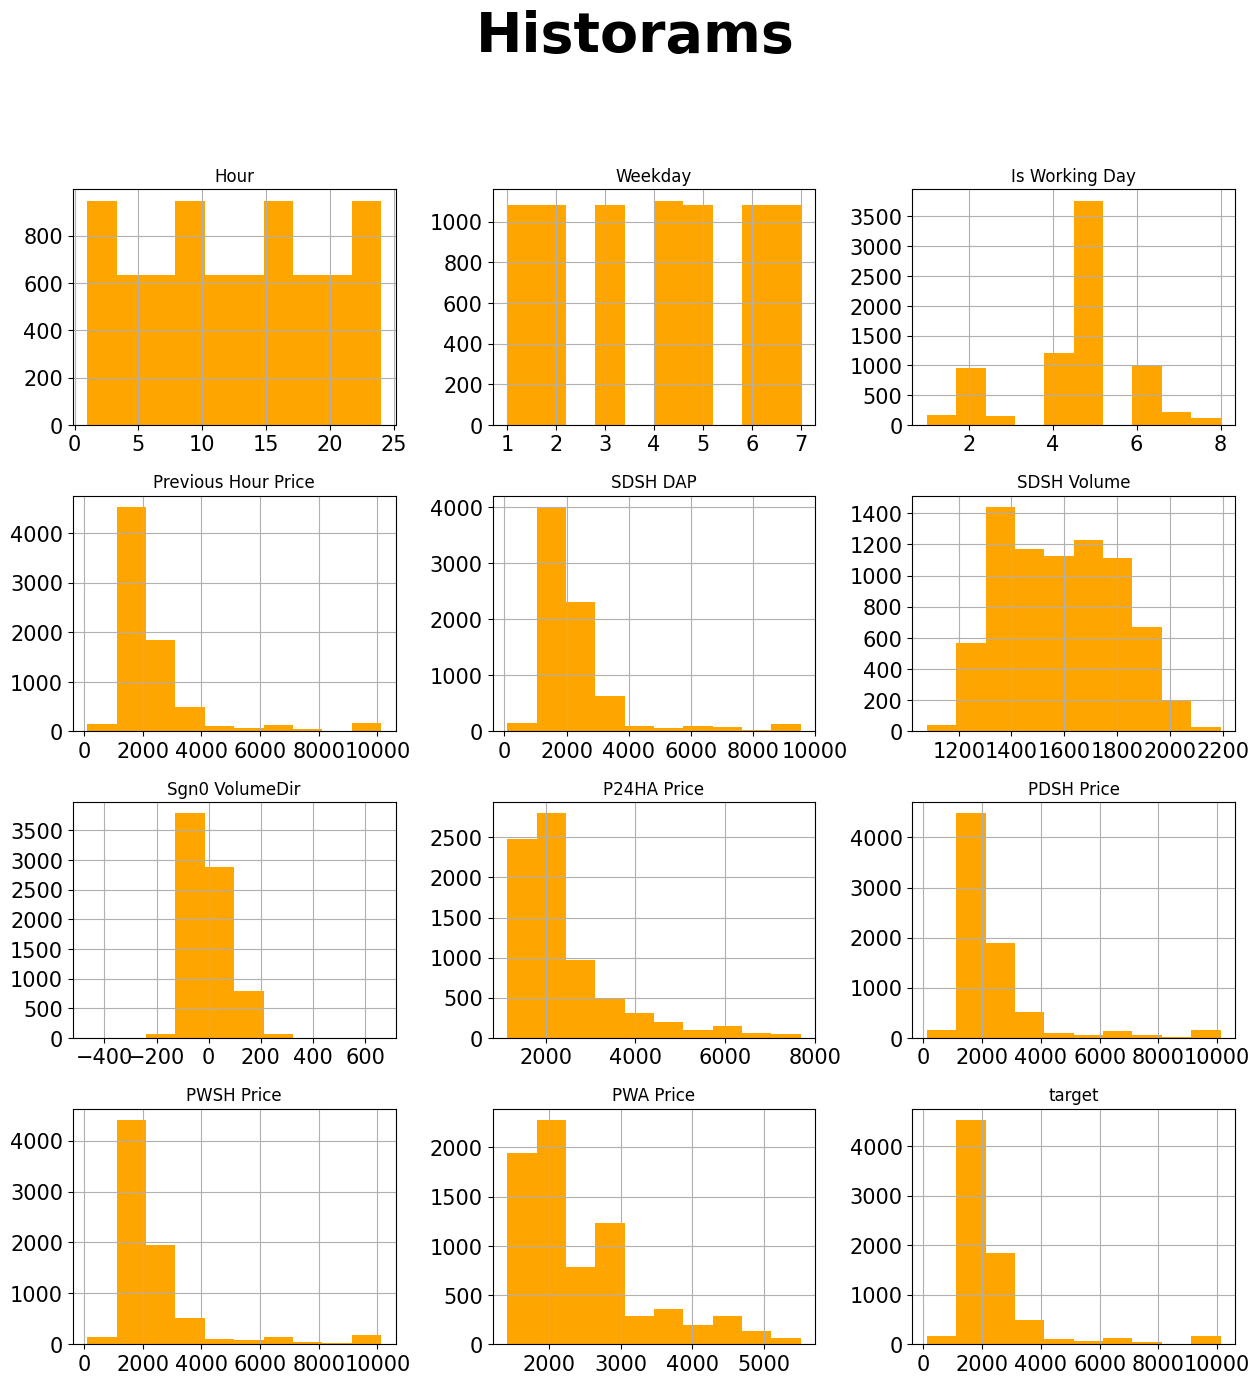

In [ ]:
# Plotting the Histogram
data_train.hist(sharex=False, sharey=False, xlabelsize=15, ylabelsize=15, color='orange', figsize=(15,15))
plt.suptitle("Historams", y=1.00, fontweight='bold', fontsize=40)
plt.show()

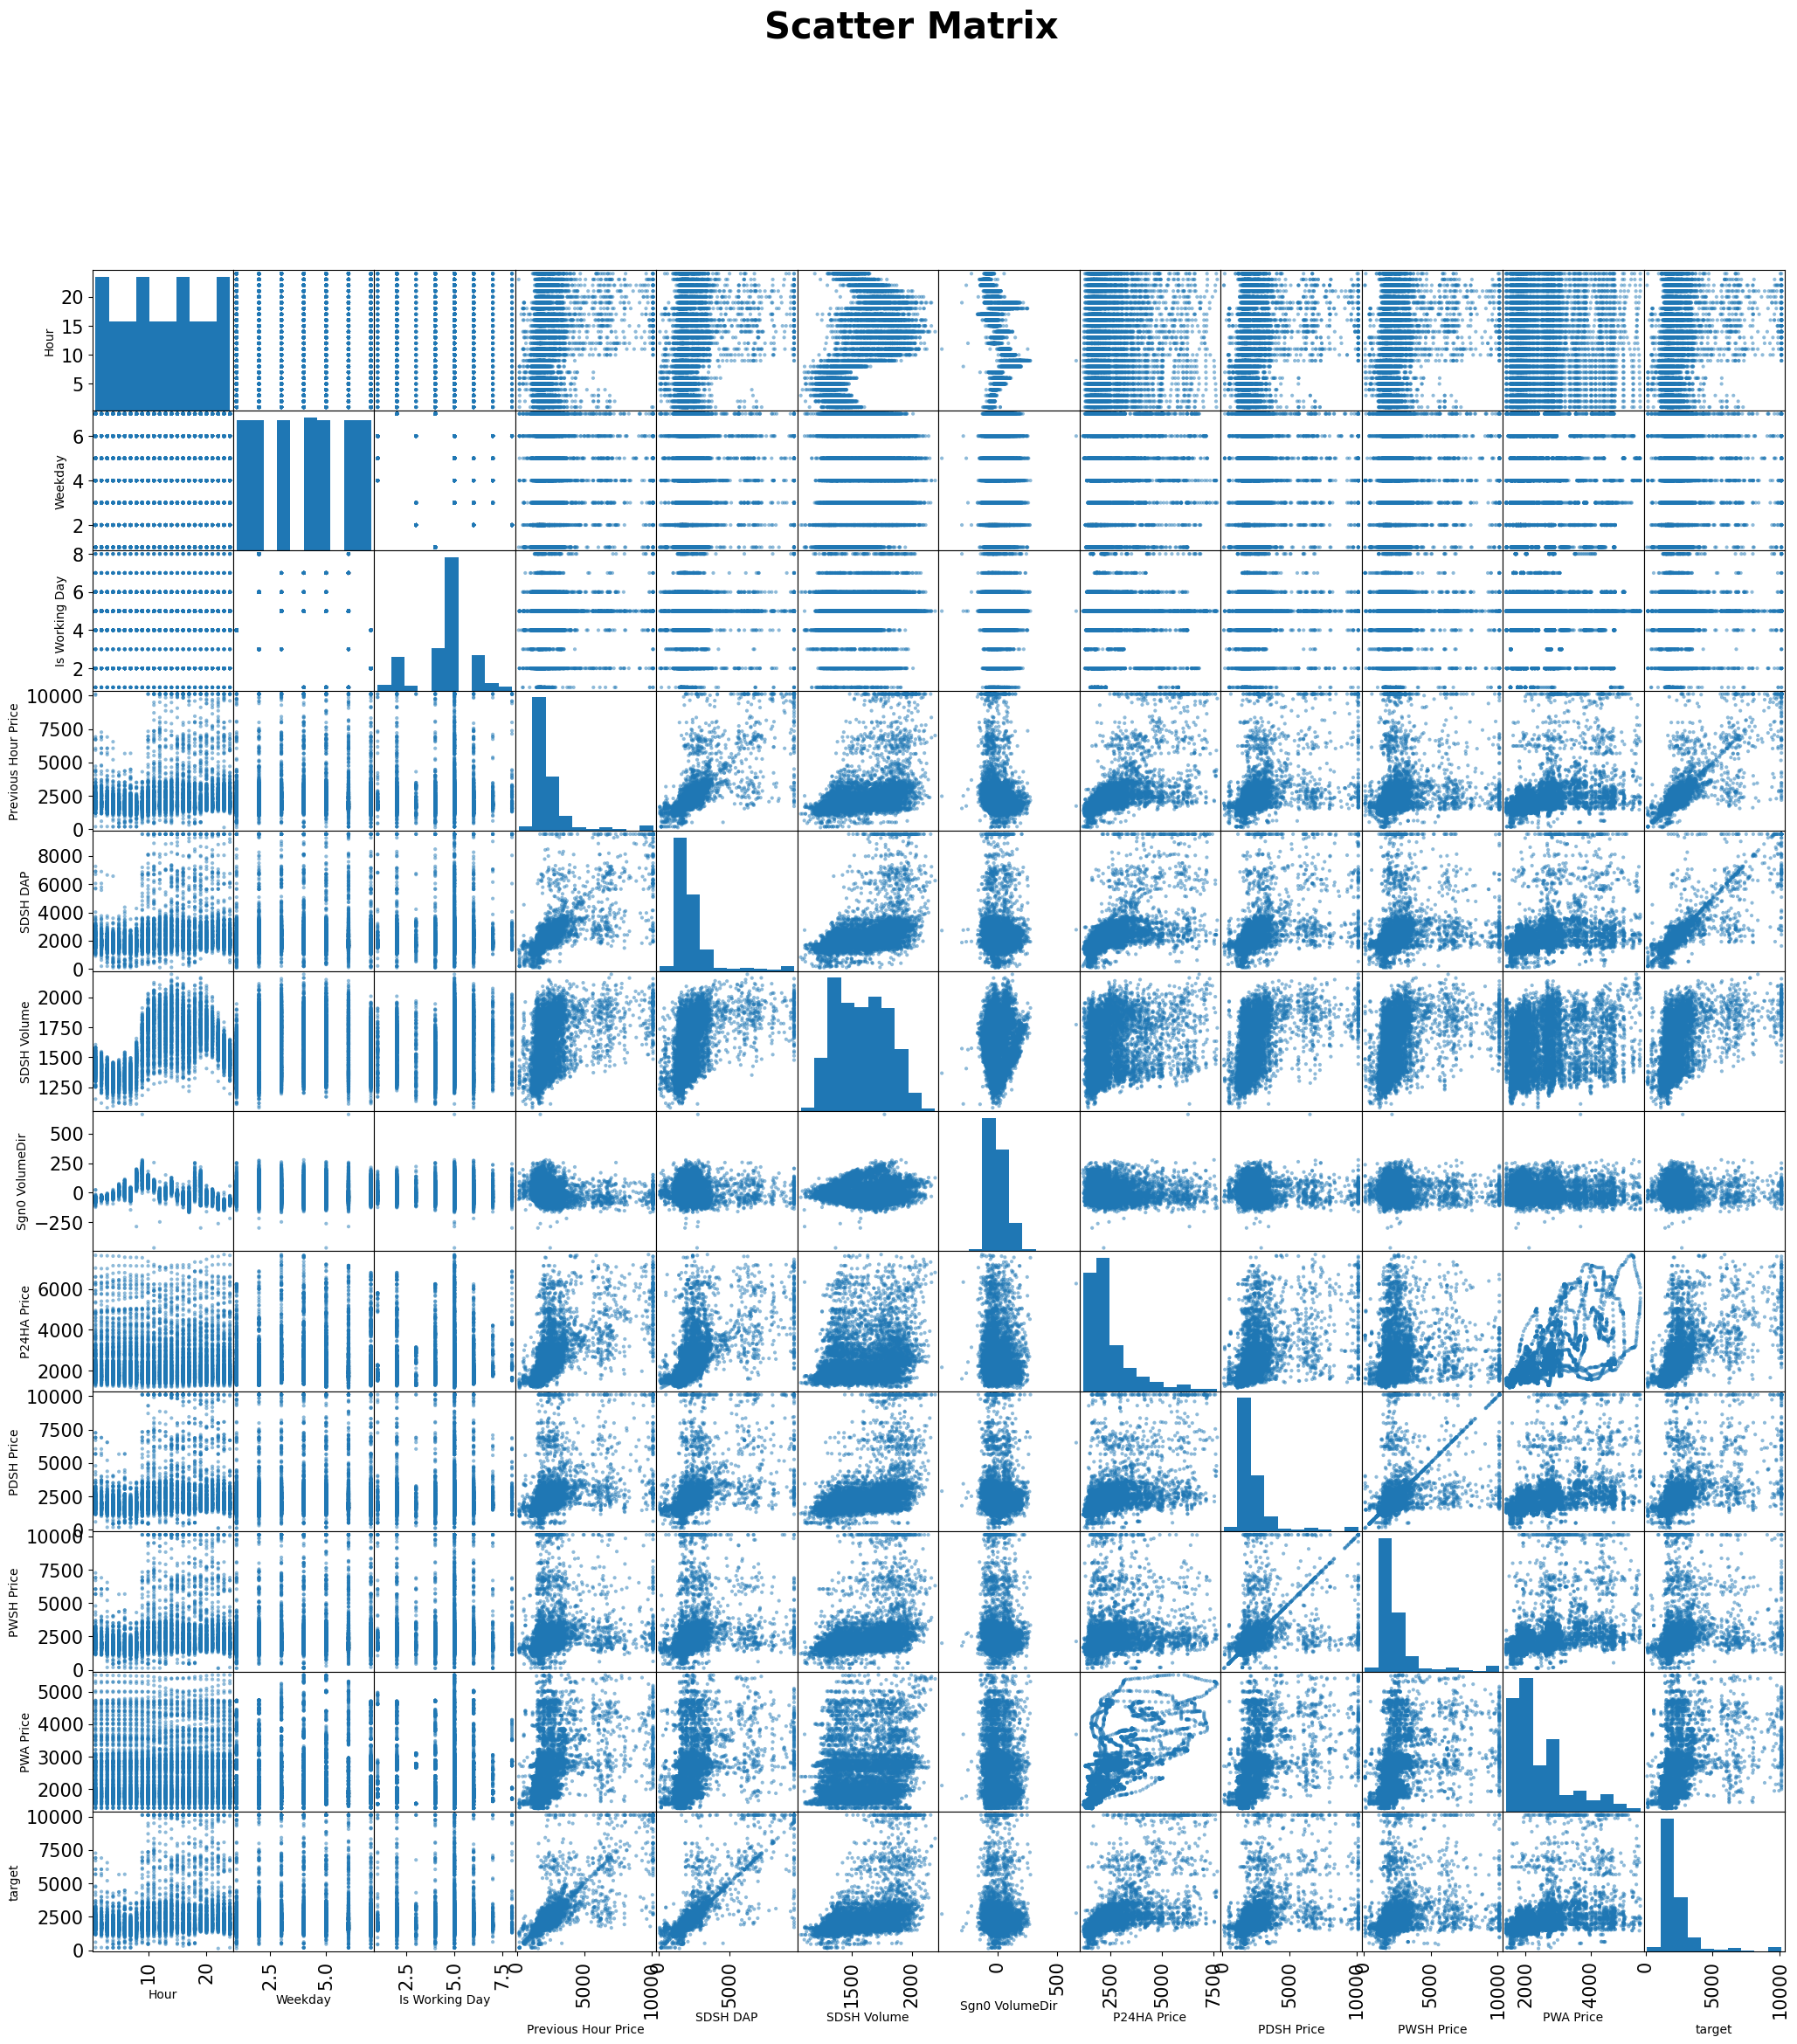

In [ ]:
# Plotting The ScatterPlot for checking correlations and outliers
from pandas.plotting._matplotlib import scatter_matrix
Axes= scatter_matrix(data_train, figsize= (25,25))
plt.suptitle('Scatter Matrix', y= 1.00, fontweight="bold", fontsize= 30)
plt.rcParams['axes.labelsize']= 15
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
plt.show()

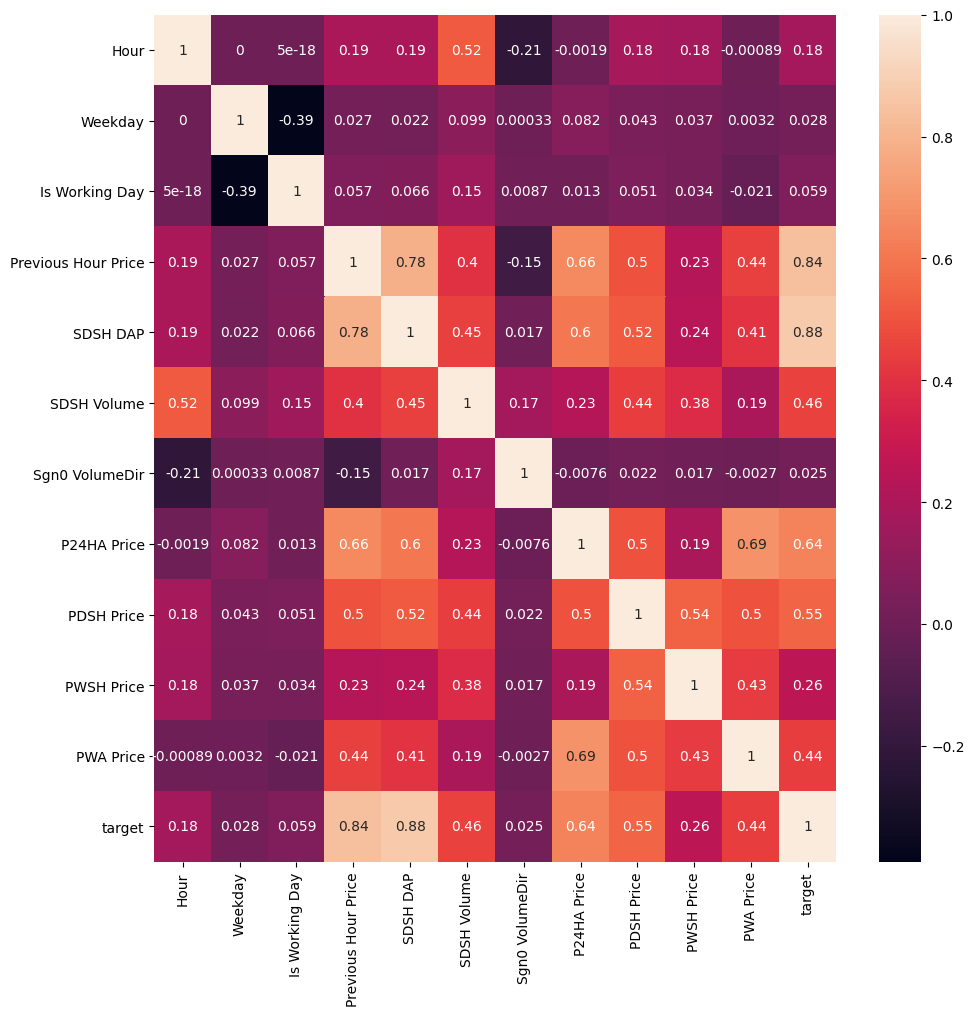

In [ ]:
# Heatmap is an effective way for identifying correlated features
plt.figure(figsize=(11,11))
plt.style.use('default')
sns.heatmap(data_train.corr(), annot= True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f93cd0d90>,
      dtype=object)

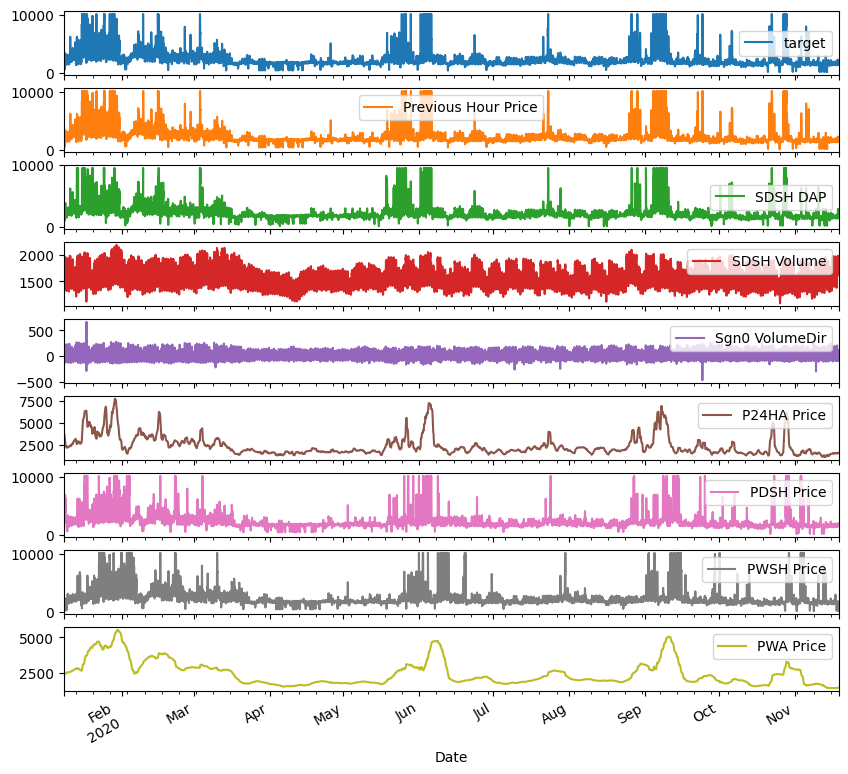

In [ ]:
# Visualizing our features month wise
data_train.set_index('Date')[['target',
                  'Previous Hour Price',
                 'SDSH DAP', 'SDSH Volume', 'Sgn0 VolumeDir', 
                 'P24HA Price', 'PDSH Price', 'PWSH Price', 'PWA Price']].plot(subplots=True,figsize=(10,10))

#  Handeling Highly correlated values


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant 

In [ ]:
# Function to calculate The variance Inflation factor (VIF) to handle correlation here the threshold =5

def calculate_vif(data_train, thresh=5):
  const= add_constant(data_train)
  cols= const.columns
  variables= np.arange(const.shape[1])
  vif_data= pd.Series([variance_inflation_factor(const.values,i)
             for i in range(const.shape[1]) ],
             index= const.columns).to_frame()

  vif_data= vif_data.sort_values(by=0, ascending=False).rename(columns={0:'VIF'})
  vif_data= vif_data.drop('const')
  vif_data= vif_data[vif_data['VIF']> thresh] 

  print('Feaatures above VIF threshold:\n')
  print(vif_data[vif_data['VIF']> thresh])

  return data_train         


In [ ]:
calculate_vif(data_train.drop('target',axis=1)._get_numeric_data())

Feaatures above VIF threshold:

Empty DataFrame
Columns: [VIF]
Index: []


Hour  Weekday  Is Working Day  Previous Hour Price  SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price  PDSH Price  PWSH Price    PWA Price
0        1        4               7              2400.41   2479.45       1383.7          -100.7  3654.911667     2473.00     1837.47  2296.059524
1        2        4               7              2475.68   2494.00       1339.3           -44.4  3655.023333     2459.38     1434.83  2299.858393
2        3        4               7              2484.40   2474.85       1309.4           -29.9  3656.065833     2370.61     1498.33  2306.105833
3        4        4               7              2486.89   2478.66       1294.7           -14.7  3660.910833     2021.43     1462.42  2311.990119
4        5        4               7              2533.42   2809.63       1361.4            66.7  3682.243750     2176.48     1455.85  2318.365119
...    ...      ...             ...                  ...       ...          ...             ...          ...         ...         ...          ...
7579    20        4               5              1470.69   1886.14       1892.6           -23.4  1624.207917     1584.67     1303.85  1442.281607
7580    21        4               5              1453.59   1358.54       1850.3           -42.3  1618.746250     1599.34     1311.11  1443.172917
7581    22        4               5              1463.07   1772.66       1759.8           -90.5  1613.068333     1922.86     1368.03  1444.077440
7582    23        4               5              1937.00   1700.50       1668.2           -91.6  1613.657500     1719.45     1335.67  1447.464167
7583    24        4               5              1924.55   1507.32       1614.3           -53.9  1622.203333     1503.84      183.26  1450.969405

[7584 rows x 11 columns]

#  Handling Outliers

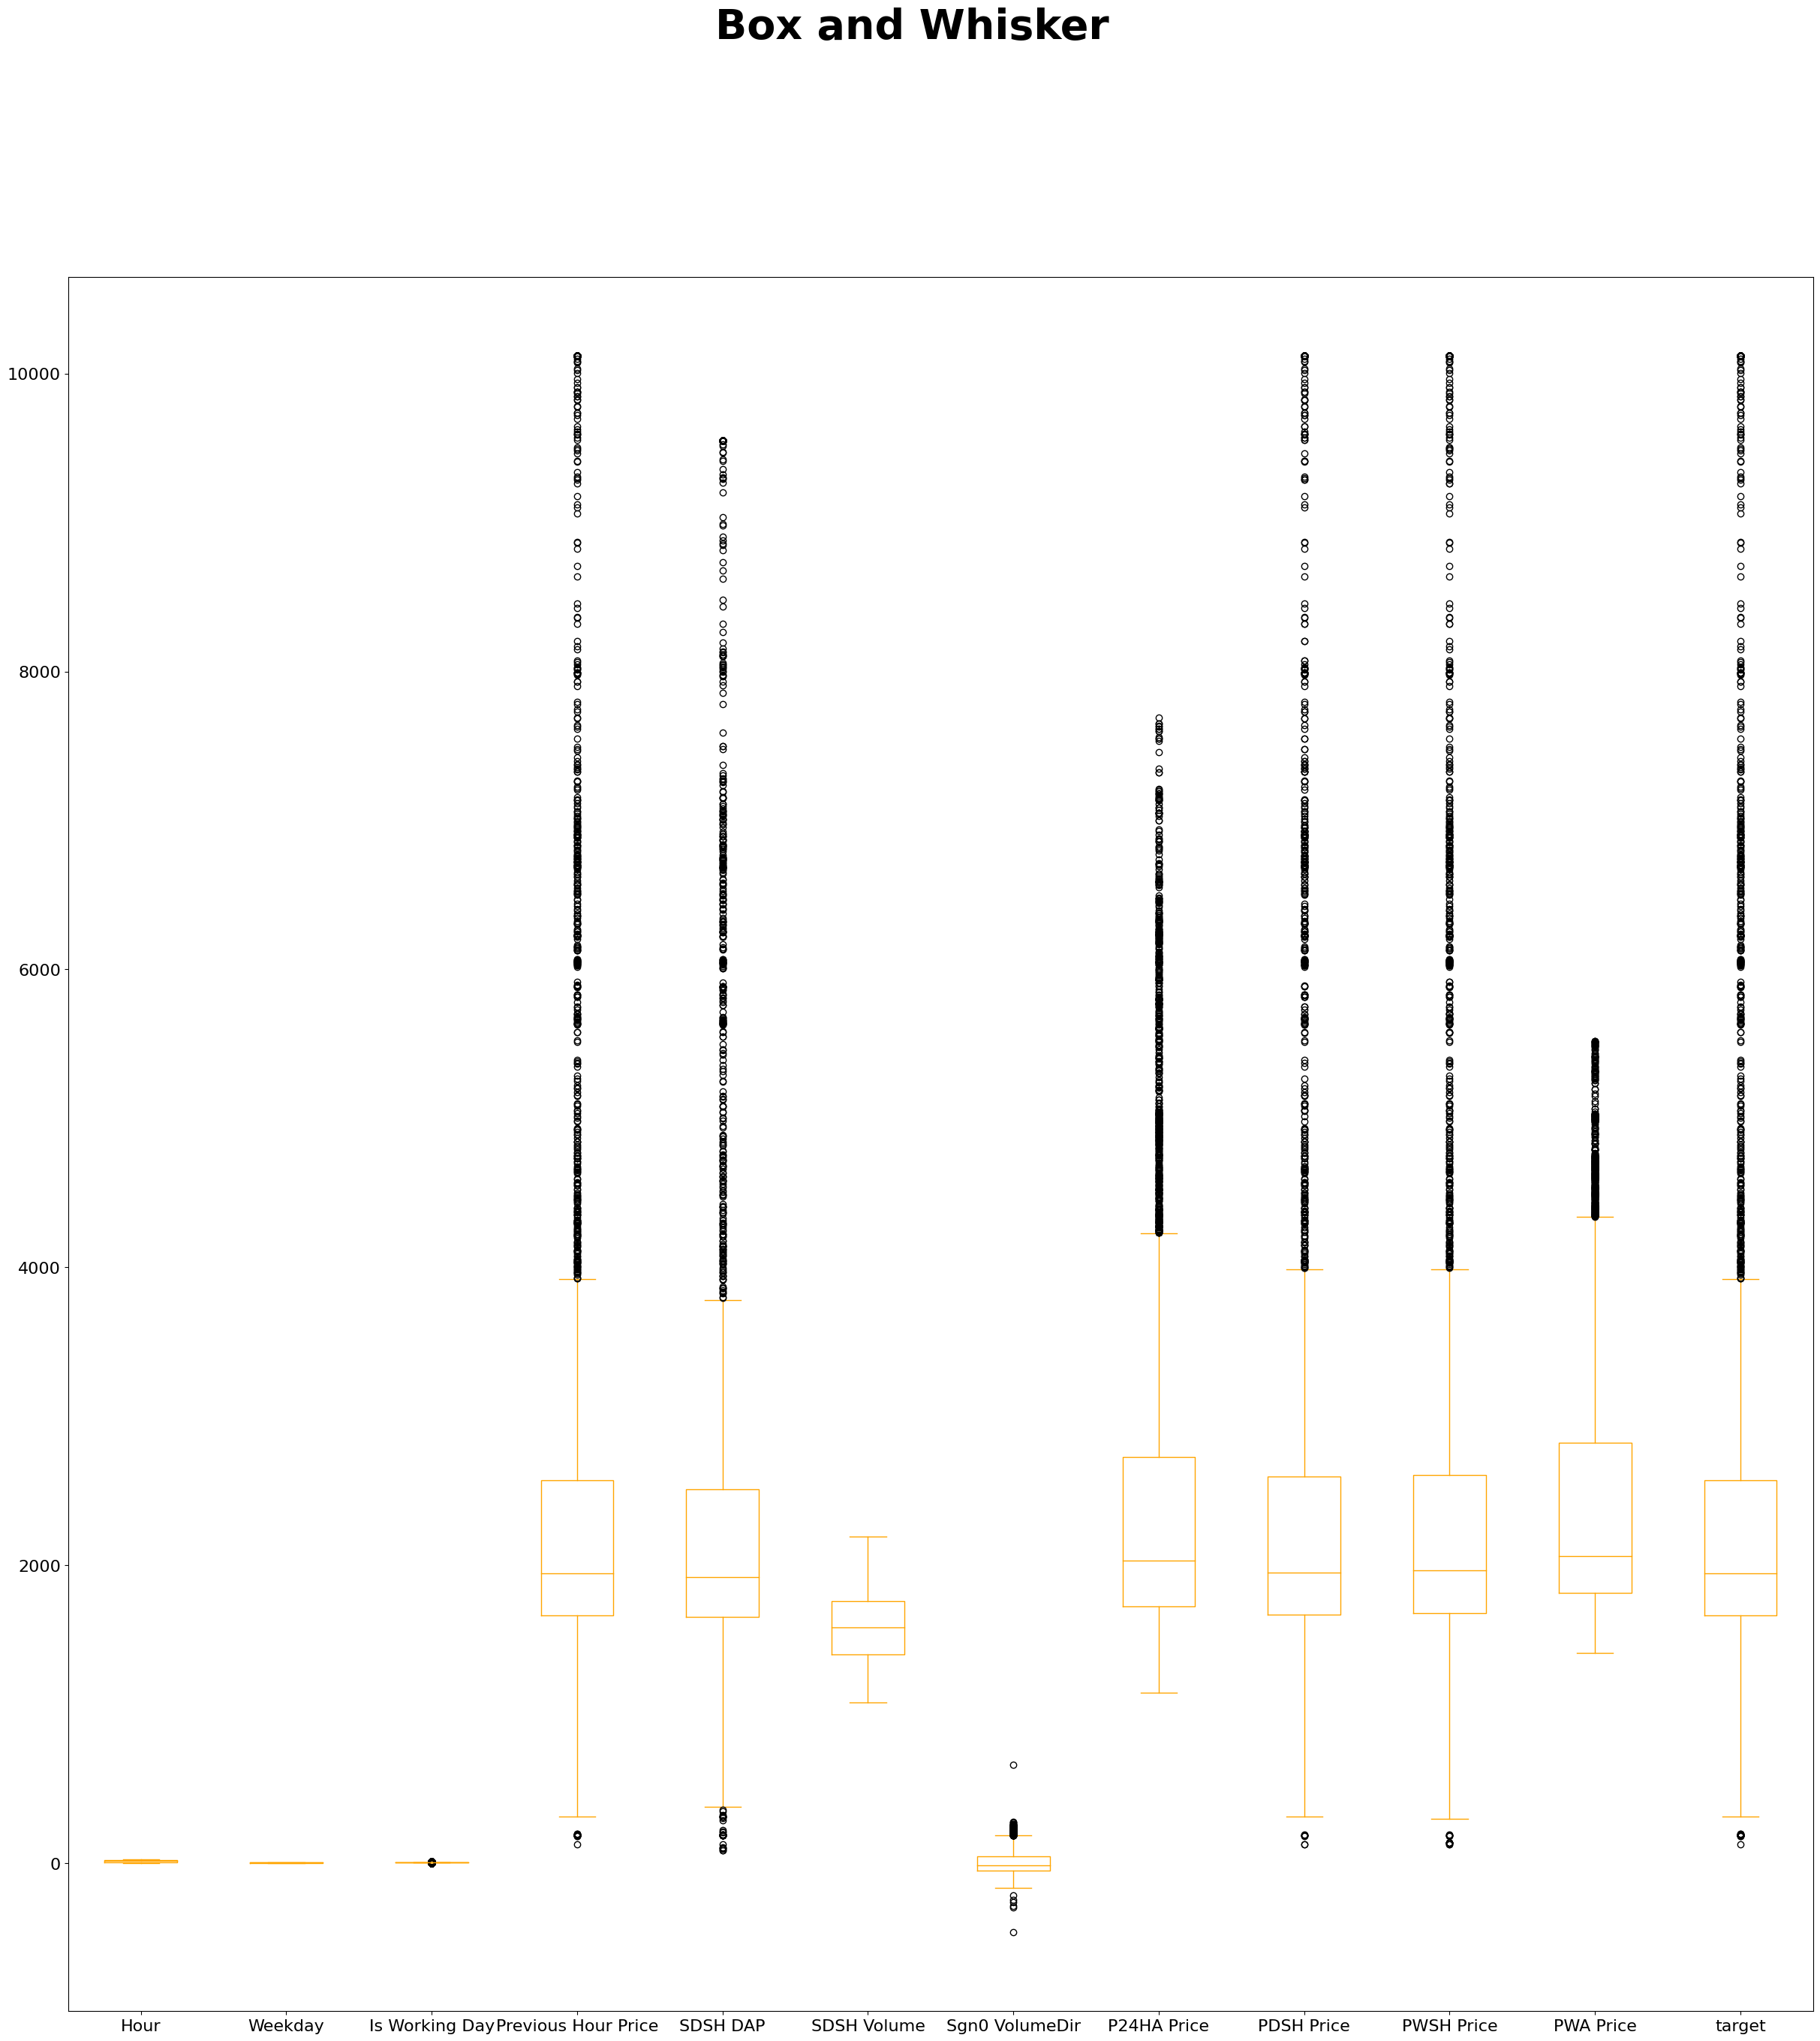

In [ ]:
# Ploting BoxPlot for Identifying Outliers
data_train.plot(kind='box',subplots=False, layout=(3,3), sharex=False, sharey= False, fontsize=16, color='orange', figsize=(30,30))
plt.suptitle("Box and Whisker", y=1.00, fontweight='bold', fontsize=40)
plt.show()

In [ ]:
df1_train= data_train[[ 'Hour', 'Weekday', 
                 'Is Working Day', 'Previous Hour Price',
                 'SDSH DAP', 'SDSH Volume', 'Sgn0 VolumeDir',
                 'P24HA Price', 'PDSH Price', 'PWSH Price', 
                 'PWA Price', 'target']]
df1_train.head()

Hour  Weekday  Is Working Day  Previous Hour Price  SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price  PDSH Price  PWSH Price    PWA Price   target
0     1        4               7              2400.41   2479.45       1383.7          -100.7  3654.911667     2473.00     1837.47  2296.059524  2475.68
1     2        4               7              2475.68   2494.00       1339.3           -44.4  3655.023333     2459.38     1434.83  2299.858393  2484.40
2     3        4               7              2484.40   2474.85       1309.4           -29.9  3656.065833     2370.61     1498.33  2306.105833  2486.89
3     4        4               7              2486.89   2478.66       1294.7           -14.7  3660.910833     2021.43     1462.42  2311.990119  2533.42
4     5        4               7              2533.42   2809.63       1361.4            66.7  3682.243750     2176.48     1455.85  2318.365119  2850.75

In [ ]:
df1_train.shape

(7584, 12)

In [ ]:
# function to handle Outliers 
def outliers_Mask(df1_train):
  Q10= df1_train.quantile(0.1)
  Q90= df1_train.quantile(0.9)
  Range= Q90- Q10
  trueList= ~((df1_train < (Q10 - 1.5 * Range)) |(df1_train > (Q90 + 1.5 * Range)))
  return trueList

In [ ]:
outliersFilters = outliers_Mask(df1_train)
df1_train= df1_train[outliersFilters]
df1_train.dropna(inplace=True)

In [ ]:
# the resultant dimension of our dataset after performing EDA
df1_train.shape

(6737, 12)

In [ ]:
df1_train.describe()

Hour      Weekday  Is Working Day  Previous Hour Price     SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price   PDSH Price   PWSH Price    PWA Price       target
count  6737.000000  6737.000000     6737.000000          6737.000000  6737.000000   6737.00000     6737.000000  6737.000000  6737.000000  6737.000000  6737.000000  6737.000000
mean     12.086537     3.977438        4.549651          2082.675714  2018.513167   1559.10236       -0.151195  2260.962306  2074.675198  2127.442778  2321.077477  2069.936728
std       7.030542     2.027592        1.392508           741.390839   659.783390    201.21783       71.579862   906.707552   725.499852   786.858492   778.841952   710.552935
min       1.000000     1.000000        1.000000           124.160000    87.380000   1079.80000     -297.200000  1145.512917   124.160000   124.160000  1409.440833   124.160000
25%       6.000000     2.000000        4.000000          1648.080000  1632.870000   1382.50000      -49.300000  1704.668333  1645.810000  1658.910000  1791.863869  1647.010000
50%      12.000000     4.000000        5.000000          1892.510000  1858.670000   1546.50000      -16.200000  1967.200417  1896.530000  1919.380000  1995.310714  1891.920000
75%      18.000000     6.000000        5.000000          2392.500000  2354.930000   1720.20000       40.100000  2450.814583  2396.810000  2446.290000  2699.772917  2385.540000
max      24.000000     7.000000        8.000000          6376.170000  5888.440000   2138.00000      269.600000  7150.461837  6360.490000  6438.870000  5520.089733  6359.770000

In [ ]:
# X contains all the independent features
X = df1_train.loc[:, ['Hour', 'Weekday',
                 'Is Working Day', 'Previous Hour Price',
                 'SDSH DAP', 'SDSH Volume', 'Sgn0 VolumeDir', 
                 'P24HA Price', 'PDSH Price', 'PWSH Price', 'PWA Price']]
X.head()

Hour  Weekday  Is Working Day  Previous Hour Price  SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price  PDSH Price  PWSH Price    PWA Price
0     1        4               7              2400.41   2479.45       1383.7          -100.7  3654.911667     2473.00     1837.47  2296.059524
1     2        4               7              2475.68   2494.00       1339.3           -44.4  3655.023333     2459.38     1434.83  2299.858393
2     3        4               7              2484.40   2474.85       1309.4           -29.9  3656.065833     2370.61     1498.33  2306.105833
3     4        4               7              2486.89   2478.66       1294.7           -14.7  3660.910833     2021.43     1462.42  2311.990119
4     5        4               7              2533.42   2809.63       1361.4            66.7  3682.243750     2176.48     1455.85  2318.365119

In [ ]:
# Y contains the dependent feature
Y = df1_train.iloc[:, -1]
Y.head()


0    2475.68
1    2484.40
2    2486.89
3    2533.42
4    2850.75
Name: target, dtype: float64

In [ ]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(selection.feature_importances_)


[0.01655969 0.01191423 0.00963773 0.27462377 0.45406986 0.02978325
 0.02232199 0.0732199  0.04796784 0.0262097  0.03369205]


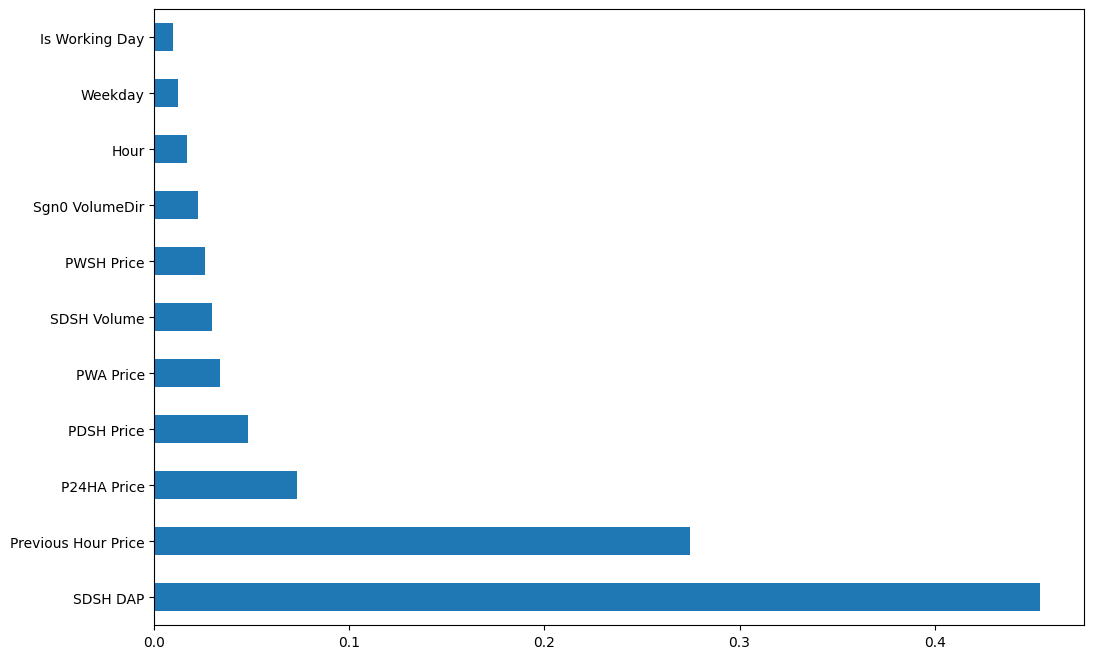

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [ ]:
# Random Forest Model fitting in our training data
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# calculating the predicted value
y_pred_rand = reg_rf.predict(X_test)


In [ ]:
# calculating the r-square to check how close the data point are to the fitted model
reg_rf.score(X_train, y_train)


0.9735307997307328

In [ ]:
# calculating the r-square to check how close the data point are to the fitted model
reg_rf.score(X_test, y_test)


0.7751062919459731

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


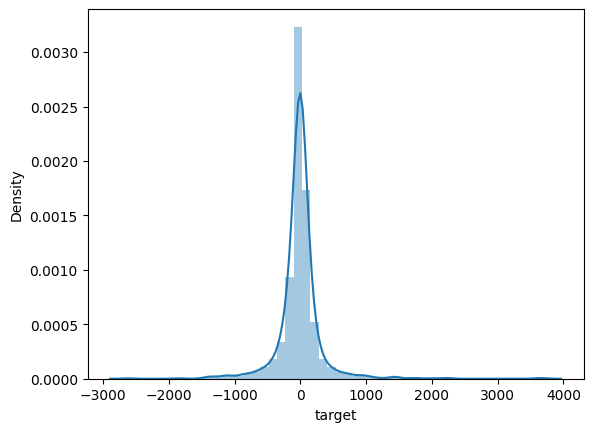

In [ ]:
# Ploting distribution graph to check how our predicted value is distributed
sns.distplot(y_test-y_pred_rand)
plt.show()

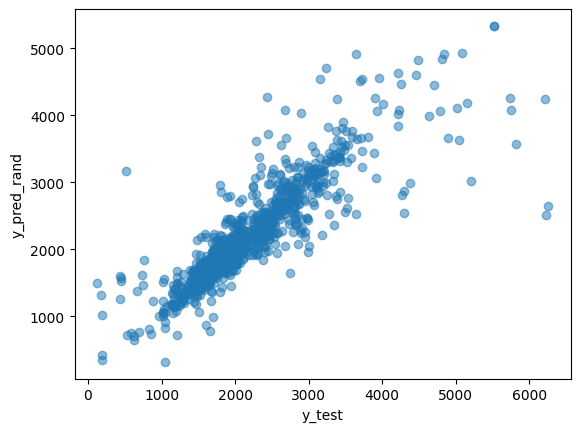

In [ ]:
plt.scatter(y_test, y_pred_rand, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_rand")
plt.show()

In [ ]:
# Calculating The model Evalution Matrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rand))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rand))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rand)))

MAE: 174.85899562962928
MSE: 120221.18849582435
RMSE: 346.72927262609994


In [ ]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.3352600467315948

#hyperparameter Tunning


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_


{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
prediction_rand = rf_random.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


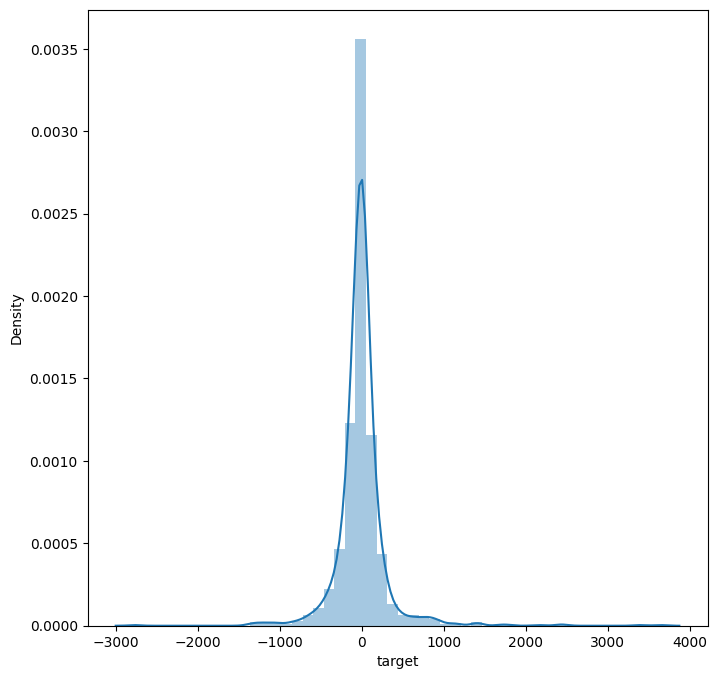

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction_rand)
plt.show()

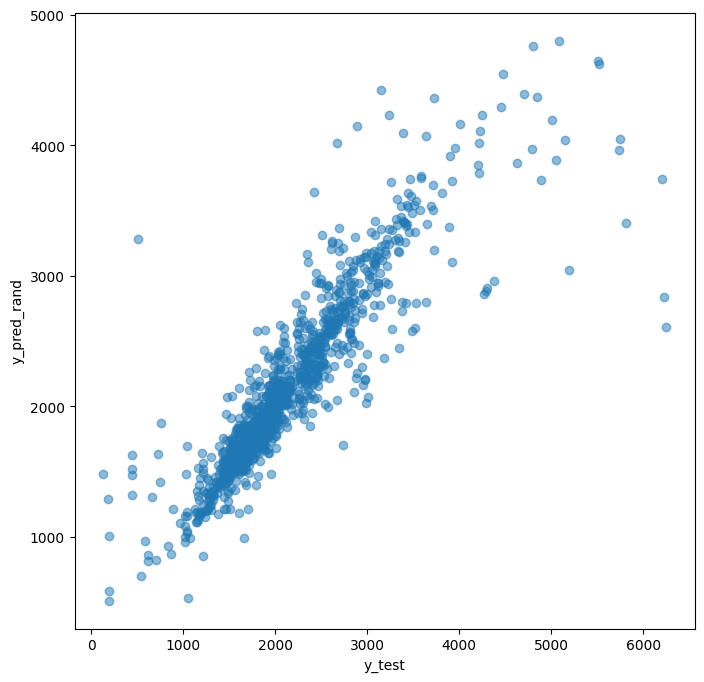

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction_rand, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_rand")
plt.show()

In [ ]:
# Calculating The model Evalution Matrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction_rand))
print('MSE:', metrics.mean_squared_error(y_test, prediction_rand))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rand)))

MAE: 164.1997512998984
MSE: 106213.63068733932
RMSE: 325.9043275063087


#Artificial Neural Network

In [ ]:


# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))
# Compile model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=32, verbose=0)
# list all data in history


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


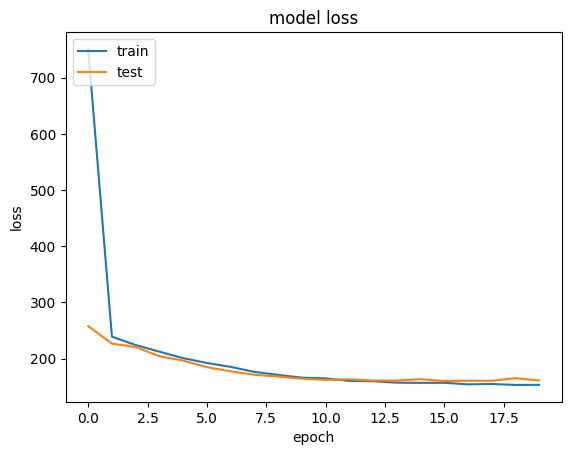

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
prediction_ann=model.predict(X_test)


In [ ]:
prediction_ann

(1348, 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


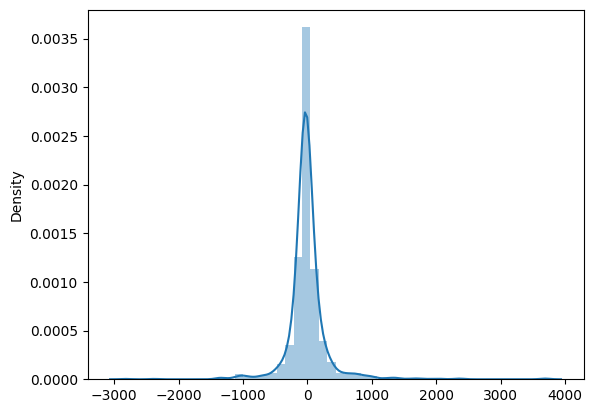

In [ ]:
sns.distplot(y_test.values.reshape(-1,1)-prediction_ann)


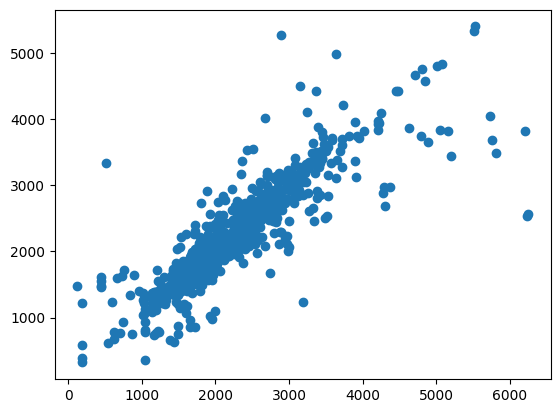

In [ ]:
plt.scatter(y_test,prediction_ann)


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction_ann))
print('MSE:', metrics.mean_squared_error(y_test, prediction_ann))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_ann)))

MAE: 168.15990979273286
MSE: 118022.15333688105
RMSE: 343.54352466155007


# Reading Test dataset

In [ ]:
df_test=data= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/quantsys_assinment/Test Set.xlsx')

In [ ]:
df_test.head()

Date  Hour  Weekday  Is Working Day  Previous Hour Price  SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price  PDSH Price  PWSH Price    PWA Price  target
0 2020-11-19 00:00:00     1        5               5              1501.96   1501.70       1563.7           -50.6  1622.125000     1513.71     593.880  1458.818810     NaN
1 2020-11-19 01:00:00     2        5               5              1475.95   1508.89       1522.3           -41.4  1620.551667     1487.63    1004.500  1464.069226     NaN
2 2020-11-19 02:00:00     3        5               5              1479.86   1379.23       1468.5           -53.8  1620.227917     1368.59    1025.598  1466.898750     NaN
3 2020-11-19 03:00:00     4        5               5              1484.50   1335.80       1443.3           -25.2  1625.057500     1321.87    1046.696  1469.630310     NaN
4 2020-11-19 04:00:00     5        5               5              1318.03   1329.68       1445.1             1.8  1624.897500     1317.43    1067.794  1471.245393     NaN

In [ ]:
df_test.isnull().sum()

Date                    0
Hour                    0
Weekday                 0
Is Working Day          0
Previous Hour Price     0
SDSH DAP                0
SDSH Volume             0
Sgn0 VolumeDir          0
P24HA Price             0
PDSH Price              0
PWSH Price              0
PWA Price               0
target                 96
dtype: int64

In [ ]:
# copying the test data for another model 
df_test_random=df_test

In [ ]:
df_test_random.head()

Date  Hour  Weekday  Is Working Day  Previous Hour Price  SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price  PDSH Price  PWSH Price    PWA Price  target
0 2020-11-19 00:00:00     1        5               5              1501.96   1501.70       1563.7           -50.6  1622.125000     1513.71     593.880  1458.818810     NaN
1 2020-11-19 01:00:00     2        5               5              1475.95   1508.89       1522.3           -41.4  1620.551667     1487.63    1004.500  1464.069226     NaN
2 2020-11-19 02:00:00     3        5               5              1479.86   1379.23       1468.5           -53.8  1620.227917     1368.59    1025.598  1466.898750     NaN
3 2020-11-19 03:00:00     4        5               5              1484.50   1335.80       1443.3           -25.2  1625.057500     1321.87    1046.696  1469.630310     NaN
4 2020-11-19 04:00:00     5        5               5              1318.03   1329.68       1445.1             1.8  1624.897500     1317.43    1067.794  1471.245393     NaN

# Predicting target value using Random Forest Model for the test set


In [ ]:


# Predicting target value using Random Forest Model for the test set
y = df1_train['target']

features = ['Hour', 'Weekday', 'Is Working Day',
            'Previous Hour Price', 'SDSH DAP', 
            'SDSH Volume', 'Sgn0 VolumeDir', 'P24HA Price', 
            'PDSH Price', 'PWSH Price', 'PWA Price']
XX = pd.get_dummies(df1_train[features])
XX_test = pd.get_dummies(df_test_random[features])
predictions_rf_test = rf_random.predict(XX_test)

output = pd.DataFrame({'tagret': predictions_rf_test})


In [ ]:
output.head()

tagret
0  1485.575340
1  1486.503704
2  1397.382157
3  1389.960484
4  1349.060291

In [ ]:
# importing the predicted value into data frame 
df_test_random['target']=output
df_test_random.head()

Date  Hour  Weekday  Is Working Day  Previous Hour Price  SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price  PDSH Price  PWSH Price    PWA Price       target
0 2020-11-19 00:00:00     1        5               5              1501.96   1501.70       1563.7           -50.6  1622.125000     1513.71     593.880  1458.818810  1485.575340
1 2020-11-19 01:00:00     2        5               5              1475.95   1508.89       1522.3           -41.4  1620.551667     1487.63    1004.500  1464.069226  1486.503704
2 2020-11-19 02:00:00     3        5               5              1479.86   1379.23       1468.5           -53.8  1620.227917     1368.59    1025.598  1466.898750  1397.382157
3 2020-11-19 03:00:00     4        5               5              1484.50   1335.80       1443.3           -25.2  1625.057500     1321.87    1046.696  1469.630310  1389.960484
4 2020-11-19 04:00:00     5        5               5              1318.03   1329.68       1445.1             1.8  1624.897500     1317.43    1067.794  1471.245393  1349.060291

In [ ]:
# importing the predicted value in the excel file  
df_test_random.to_excel('/content/drive/MyDrive/Colab Notebooks/quantsys_assinment/forcasted_value_random_forest.xlsx', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [ ]:
# Readingg the excel file just for checking
cc= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/quantsys_assinment/forcasted_value_random_forest.xlsx')
cc.head()

Date  Hour  Weekday  Is Working Day  Previous Hour Price  SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price  PDSH Price  PWSH Price    PWA Price       target
0 2020-11-19 00:00:00     1        5               5              1501.96   1501.70       1563.7           -50.6  1622.125000     1513.71     593.880  1458.818810  1485.575340
1 2020-11-19 01:00:00     2        5               5              1475.95   1508.89       1522.3           -41.4  1620.551667     1487.63    1004.500  1464.069226  1486.503704
2 2020-11-19 02:00:00     3        5               5              1479.86   1379.23       1468.5           -53.8  1620.227917     1368.59    1025.598  1466.898750  1397.382157
3 2020-11-19 03:00:00     4        5               5              1484.50   1335.80       1443.3           -25.2  1625.057500     1321.87    1046.696  1469.630310  1389.960484
4 2020-11-19 04:00:00     5        5               5              1318.03   1329.68       1445.1             1.8  1624.897500     1317.43    1067.794  1471.245393  1349.060291

# Predicting target value using ANN Model for the test set


In [ ]:
df_test_ann=data= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/quantsys_assinment/Test Set.xlsx')
df_test_ann.head()

Date  Hour  Weekday  Is Working Day  Previous Hour Price  SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price  PDSH Price  PWSH Price    PWA Price  target
0 2020-11-19 00:00:00     1        5               5              1501.96   1501.70       1563.7           -50.6  1622.125000     1513.71     593.880  1458.818810     NaN
1 2020-11-19 01:00:00     2        5               5              1475.95   1508.89       1522.3           -41.4  1620.551667     1487.63    1004.500  1464.069226     NaN
2 2020-11-19 02:00:00     3        5               5              1479.86   1379.23       1468.5           -53.8  1620.227917     1368.59    1025.598  1466.898750     NaN
3 2020-11-19 03:00:00     4        5               5              1484.50   1335.80       1443.3           -25.2  1625.057500     1321.87    1046.696  1469.630310     NaN
4 2020-11-19 04:00:00     5        5               5              1318.03   1329.68       1445.1             1.8  1624.897500     1317.43    1067.794  1471.245393     NaN

In [ ]:
# Predicting target value using ANN for the test set
y_ann = df1_train['target']

features = ['Hour', 'Weekday', 'Is Working Day',
            'Previous Hour Price', 'SDSH DAP', 
            'SDSH Volume', 'Sgn0 VolumeDir', 'P24HA Price', 
            'PDSH Price', 'PWSH Price', 'PWA Price']
X_ann = pd.get_dummies(df1_train[features])
X_ann_test = pd.get_dummies(df_test_ann[features])
predictions_ann_test = model.predict(X_ann_test).reshape(96)

In [ ]:
output1 = pd.DataFrame({'target':predictions_ann_test})


In [ ]:
output1.head()

target
0  1488.347900
1  1498.862549
2  1396.787231
3  1378.826172
4  1347.706909

In [ ]:
# importing the predicted value into data frame 
df_test_ann['target']=output1
df_test_ann.head()

Date  Hour  Weekday  Is Working Day  Previous Hour Price  SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price  PDSH Price  PWSH Price    PWA Price       target
0 2020-11-19 00:00:00     1        5               5              1501.96   1501.70       1563.7           -50.6  1622.125000     1513.71     593.880  1458.818810  1488.347900
1 2020-11-19 01:00:00     2        5               5              1475.95   1508.89       1522.3           -41.4  1620.551667     1487.63    1004.500  1464.069226  1498.862549
2 2020-11-19 02:00:00     3        5               5              1479.86   1379.23       1468.5           -53.8  1620.227917     1368.59    1025.598  1466.898750  1396.787231
3 2020-11-19 03:00:00     4        5               5              1484.50   1335.80       1443.3           -25.2  1625.057500     1321.87    1046.696  1469.630310  1378.826172
4 2020-11-19 04:00:00     5        5               5              1318.03   1329.68       1445.1             1.8  1624.897500     1317.43    1067.794  1471.245393  1347.706909

In [ ]:
# importing the predicted value in the excel file  
df_test_ann.to_excel('/content/drive/MyDrive/Colab Notebooks/quantsys_assinment/forcasted_value_ann.xlsx', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [ ]:
# Readingg the excel file just for checking
df_ann= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/quantsys_assinment/forcasted_value_ann.xlsx')
df_ann.head()

Date  Hour  Weekday  Is Working Day  Previous Hour Price  SDSH DAP  SDSH Volume  Sgn0 VolumeDir  P24HA Price  PDSH Price  PWSH Price    PWA Price       target
0 2020-11-19 00:00:00     1        5               5              1501.96   1501.70       1563.7           -50.6  1622.125000     1513.71     593.880  1458.818810  1488.347900
1 2020-11-19 01:00:00     2        5               5              1475.95   1508.89       1522.3           -41.4  1620.551667     1487.63    1004.500  1464.069226  1498.862549
2 2020-11-19 02:00:00     3        5               5              1479.86   1379.23       1468.5           -53.8  1620.227917     1368.59    1025.598  1466.898750  1396.787231
3 2020-11-19 03:00:00     4        5               5              1484.50   1335.80       1443.3           -25.2  1625.057500     1321.87    1046.696  1469.630310  1378.826172
4 2020-11-19 04:00:00     5        5               5              1318.03   1329.68       1445.1             1.8  1624.897500     1317.43    1067.794  1471.245393  1347.706909